### Importing libraries

In [2]:
### For Data Manipulation

import pandas as pd 
import numpy as np

### For Data Visualization

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline # set 'inline' backend for matplotlib


### For Data Preprocessing and Model Building

from bs4 import BeautifulSoup 
from selenium import webdriver

from sklearn.linear_model import LogisticRegression # Classifier 1
from sklearn.naive_bayes import MultinomialNB # Classifier 2
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
import pickle

import warnings
warnings.filterwarnings('ignore')

### Dataset from Kaggle

In [3]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [7]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [8]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [9]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
URL      549346 non-null object
Label    549346 non-null object
dtypes: object(2)
memory usage: 8.4+ MB


**About dataset**
- Data is contains 549,346 unique entries
- There are two columns.
    - A. Good - url is safe
    - B. Bad - url is malicious
- There is no missing value in the dataset.

In [10]:
phish_data.isnull().sum() # check for missing values

URL      0
Label    0
dtype: int64

### Preprocessing

Now use **RegexpTokenizer** and **CountVectorizer** to tokenize the words which are more important in each URL.

In [13]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+') # split string using RegEx 

In [14]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [15]:
tokenizer.tokenize(phish_data.URL[0]) # first url

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # do for all rows

In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized
123763,harborexpressservices.com/xlrmp/check/,bad,"[harborexpressservices, com, xlrmp, check]"
520402,cds-chartreuse.fr/locales/sancho.tar.gz,bad,"[cds, chartreuse, fr, locales, sancho, tar, gz]"
545878,adminzv.ru/xaRAUXHZ9r/oPOtm6hU7.php,bad,"[adminzv, ru, xaRAUXHZ, r, oPOtm, hU, php]"
84771,www.hootech.com/WinTail/,good,"[www, hootech, com, WinTail]"
60932,bellsouthpwp.net/g/y/gypsyfairy32425/,good,"[bellsouthpwp, net, g, y, gypsyfairy]"


Now use **SnowballStemmer** to process small strings to get the root words.

In [18]:
stemmer = SnowballStemmer("english")

In [ ]:
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
314008,detroitlionsticket.com/,good,"[detroitlionsticket, com]","[detroitlionsticket, com]"
502478,pertclinic.com/qsipz9g,bad,"[pertclinic, com, qsipz, g]","[pertclin, com, qsipz, g]"
423029,revolutionmyspace.com/pictures-1/ami_dolenz,good,"[revolutionmyspace, com, pictures, ami, dolenz]","[revolutionmyspac, com, pictur, ami, dolenz]"
236352,ryanscottfrost.com/,good,"[ryanscottfrost, com]","[ryanscottfrost, com]"
227770,photobucket.com/images/matsumoto%20jun/,good,"[photobucket, com, images, matsumoto, jun]","[photobucket, com, imag, matsumoto, jun]"


In [ ]:
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))

In [22]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
342349,freebase.com/view/en/new_zealand_womens_nation...,good,"[freebase, com, view, en, new, zealand, womens...","[freebas, com, view, en, new, zealand, women, ...",freebas com view en new zealand women nation s...
353662,homefinder.com/CA/Torrance/61177522d_5500_Torr...,good,"[homefinder, com, CA, Torrance, d, Torrance, B...","[homefind, com, ca, torranc, d, torranc, blvd, b]",homefind com ca torranc d torranc blvd b
483946,ib.adnxs.com/tt?id=2063435&size=728x90&referre...,bad,"[ib, adnxs, com, tt, id, size, x, referrer, ht...","[ib, adnx, com, tt, id, size, x, referr, http,...",ib adnx com tt id size x referr http www world...
519398,system-check-abevbrye.in/,bad,"[system, check, abevbrye, in]","[system, check, abevbry, in]",system check abevbry in
153443,bsbiz.eu/?p=278,good,"[bsbiz, eu, p]","[bsbiz, eu, p]",bsbiz eu p


In [23]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [24]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [25]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [27]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

### Webscraping
Now we use **WebDriver** to automate testing of webapps across browsers.

In [7]:
browser = webdriver.Chrome()

* list_urls: urls to scrape
* links_with_text: urls with their redirect links

In [8]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

Now use **BeautifulSoup** to extract links from the href attribute of anchor tags.

In [9]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [10]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [11]:
df.head()

,from,to
0,https://www.ezeephones.com/,None
1,https://www.ezeephones.com/,https://www.ezeephones.com/
2,https://www.ezeephones.com/,/cart
3,https://www.ezeephones.com/,/category/notch-phones
4,https://www.ezeephones.com/,/category/Deals - Of The Day


Model Creation

In [37]:
cv = CountVectorizer()

In [39]:
feature = cv.fit_transform(phish_data.text_sent) # transform all tokenized and stemmed text 

In [40]:
feature[:5].toarray() # convert sparse matrix into array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### Classifier 1: Logistic Regression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(trainX,trainY)

LogisticRegression()

In [44]:
lr.score(testX,testY)

0.9636514559077306

Logistic Regression gives us 96% accuracy.

In [45]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9782480479795345
Testing Accuracy : 0.9636514559077306

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36597
        Good       0.99      0.96      0.97    100740

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


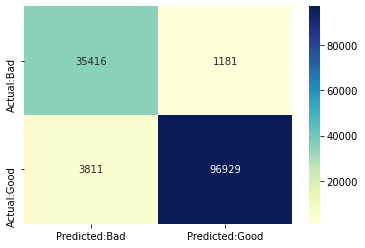

In [46]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### Classifier 2: MultinomialNB (Naive Bayes)


In [47]:
mnb = MultinomialNB()

In [48]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [49]:
mnb.score(testX,testY)

0.9574550194048217

MultinomialNB gives us 95% accuracy.

In [50]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741437687040817
Testing Accuracy : 0.9574550194048217

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38282
        Good       0.98      0.97      0.97     99055

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


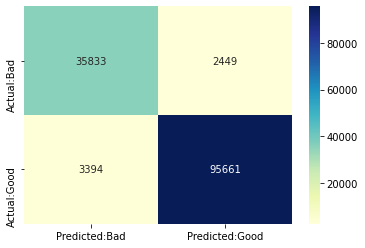

In [51]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

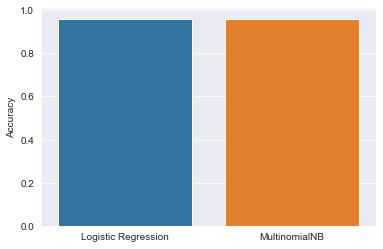

In [52]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

We choose Logistic Regression as the best fit model.

### SKLEARN PIPELINE (using LogisticRegression)

In [53]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [54]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [55]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)),
                ('logisticregression', LogisticRegression())])

In [56]:
pipeline_ls.score(testX,testY) 

0.9674450439430016

Training Accuracy : 0.9808911941244002
Testing Accuracy : 0.9674450439430016

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     36841
        Good       0.99      0.97      0.98    100496

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


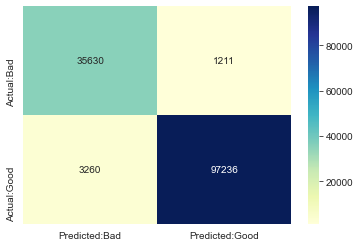

In [57]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [58]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [59]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9674450439430016


Final Model gives us about 97% accuracy.